In [38]:
import tensorflow as tf

### Create tf dataset from a list using ETL process.

It’s an easy way to convert raw data into a dataset object that can later be: Extract, Transform, Load

shuffled

batched

mapped (apply preprocessing)

and then fed to a model.


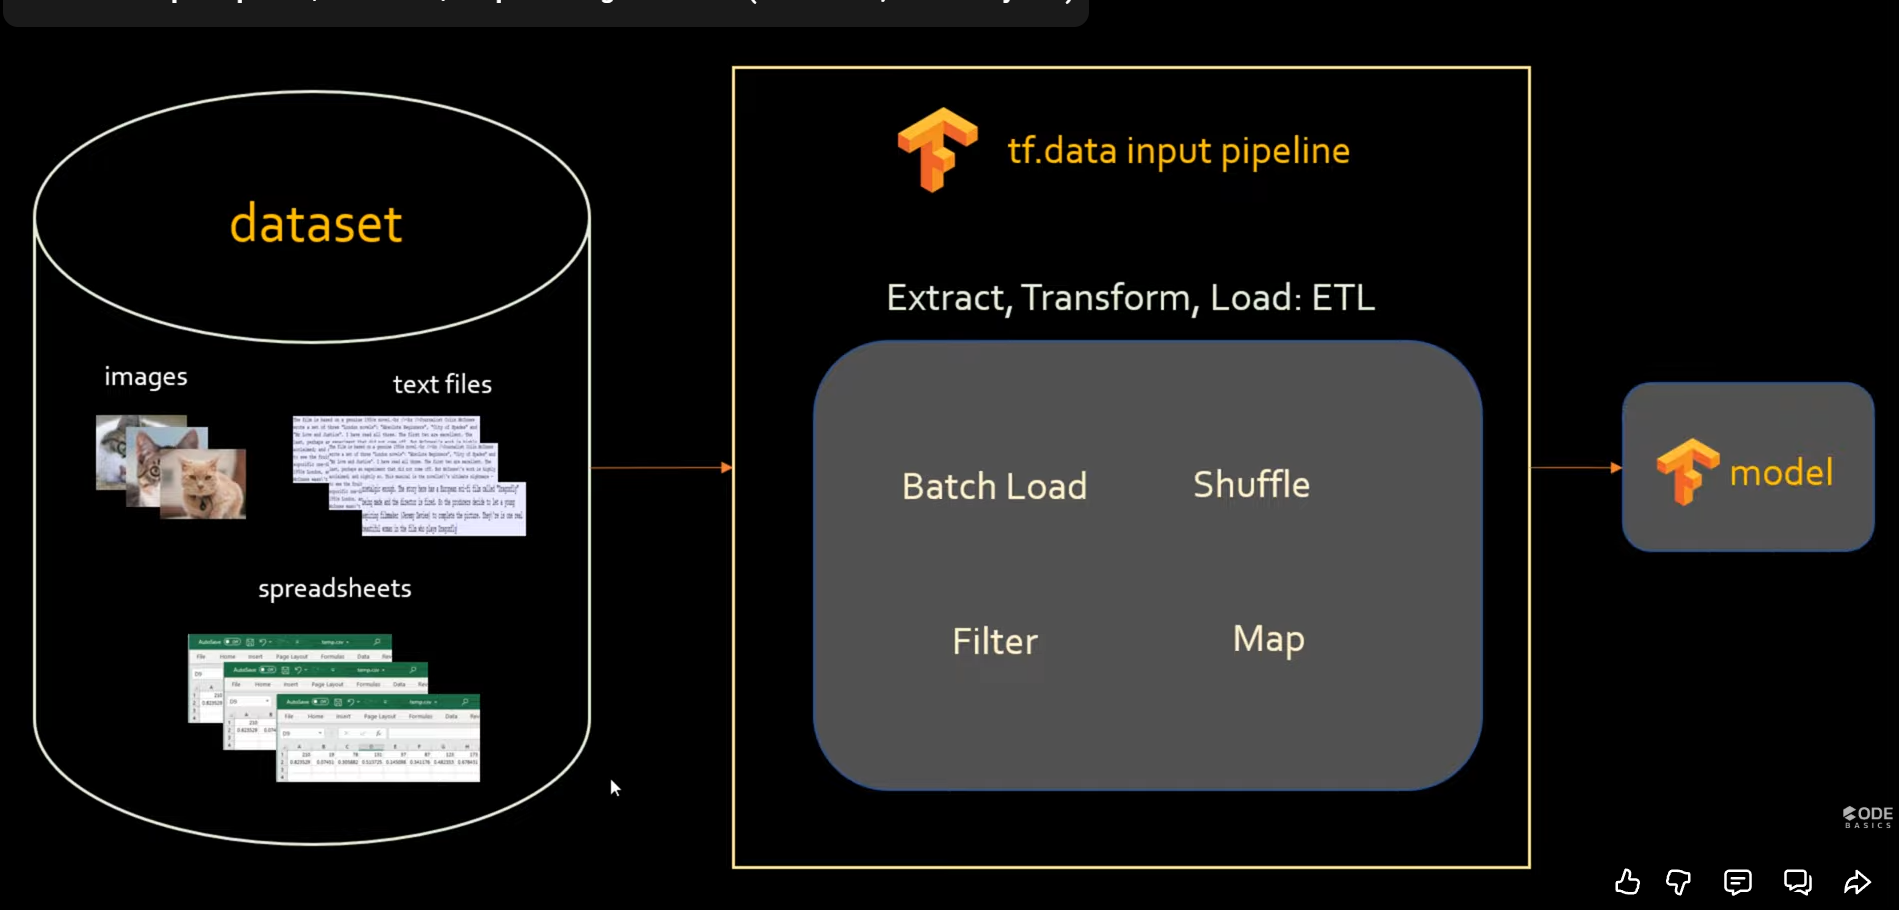
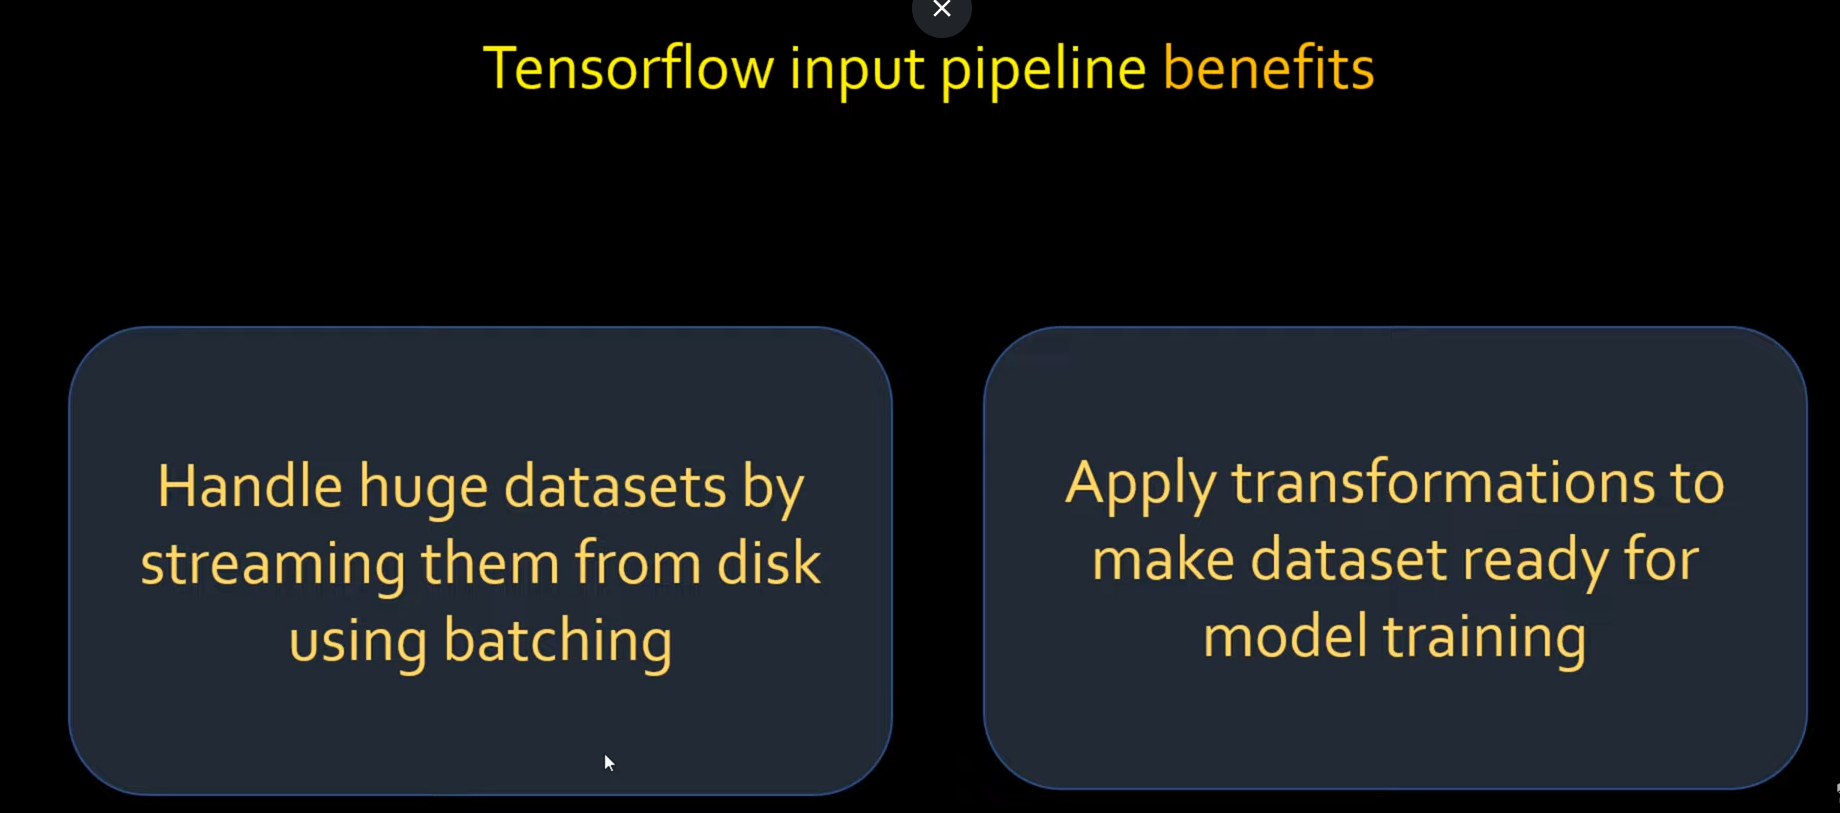


In [39]:
daily_sales_numbers = [21, 22, -108, 31, -1, 32, 34,31]

tf_dataset = tf.data.Dataset.from_tensor_slices(daily_sales_numbers)
tf_dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

### Iterate through tf dataset

In [40]:
for sales in tf_dataset: # each element as a Tensor Object so that we can apply different methods to these objects.
    print(sales)

tf.Tensor(21, shape=(), dtype=int32)
tf.Tensor(22, shape=(), dtype=int32)
tf.Tensor(-108, shape=(), dtype=int32)
tf.Tensor(31, shape=(), dtype=int32)
tf.Tensor(-1, shape=(), dtype=int32)
tf.Tensor(32, shape=(), dtype=int32)
tf.Tensor(34, shape=(), dtype=int32)
tf.Tensor(31, shape=(), dtype=int32)


### Iterate through elements as numpy elements

In [41]:
for sales in tf_dataset: # Converting Tensor object to numpy object.
    print(sales.numpy())

21
22
-108
31
-1
32
34
31


### Iterate through first n elements in tf dataset

In [42]:
for sales in tf_dataset.take(3): # take first 3 elements
    print(sales.numpy())

21
22
-108


### Filter sales numbers that are > 0 (non-negative)


In [43]:
tf_dataset = tf_dataset.filter(lambda x: x>0)
for sales in tf_dataset.as_numpy_iterator(): # .as_numpy_iterator() -> convert the tensor dataset into numpy array iterable.
    print(sales)

21
22
31
32
34
31


### Convert sales numbers from USA dollars ($) to Indian Rupees (INR) Assuming 1->72 conversation rate

In [44]:
tf_dataset = tf_dataset.map(lambda x: x*72)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

1512
1584
2232
2304
2448
2232


### Shuffle

https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset

In [45]:
tf_dataset = tf_dataset.shuffle(2) # Buffer size of 2
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

1584
2232
2304
2448
1512
2232


### Batching

In [46]:
for sales_batch in tf_dataset.batch(2): # Batch size of 2
    print(sales_batch.numpy())

[1584 2232]
[2304 2448]
[2232 1512]


### Perform all of the above operations in one shot (in One-single line)

In [47]:
tf_dataset = tf.data.Dataset.from_tensor_slices(daily_sales_numbers)

tf_dataset = tf_dataset.filter(lambda x: x>0).map(lambda y: y*72).shuffle(2).batch(2)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

[1584 1512]
[2232 2448]
[2232 2304]


### Images

In [48]:
images_ds = tf.data.Dataset.list_files(r"C:\Users\Rajeev Ranjan\Desktop\Coding Folder\Projects\Jupyter NoteBook\datasets\images\*\*", shuffle=False)
image_count = len(images_ds)
image_count

130

In [49]:
type(images_ds)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [50]:
for file in images_ds.take(3):
    print(file.numpy())

b'C:\\Users\\Rajeev Ranjan\\Desktop\\Coding Folder\\Projects\\Jupyter NoteBook\\datasets\\images\\cat\\20 Reasons Why Cats Make the Best Pets....jpg'
b'C:\\Users\\Rajeev Ranjan\\Desktop\\Coding Folder\\Projects\\Jupyter NoteBook\\datasets\\images\\cat\\7 Foods Your Cat Can_t Eat.jpg'
b'C:\\Users\\Rajeev Ranjan\\Desktop\\Coding Folder\\Projects\\Jupyter NoteBook\\datasets\\images\\cat\\A cat appears to have caught the....jpg'


In [51]:
images_ds = images_ds.shuffle(200)
for file in images_ds.take(3):
    print(file.numpy())

b'C:\\Users\\Rajeev Ranjan\\Desktop\\Coding Folder\\Projects\\Jupyter NoteBook\\datasets\\images\\dog\\Common Dog Breeds and Their Health Issues.jpg'
b'C:\\Users\\Rajeev Ranjan\\Desktop\\Coding Folder\\Projects\\Jupyter NoteBook\\datasets\\images\\cat\\Why Cats Sniff Rear Ends _ VCA Animal....png'
b'C:\\Users\\Rajeev Ranjan\\Desktop\\Coding Folder\\Projects\\Jupyter NoteBook\\datasets\\images\\dog\\Welcoming Your Adopted Dog Into Your....jpg'


In [52]:
class_names = ["cat","dog"]

### Manual train-test Split

In [53]:
train_size = int(image_count*0.8)
train_ds = images_ds.take(train_size) # take -> take first (train_size) number of samples from the Tensorflow object list.
test_ds = images_ds.skip(train_size) # skip -> skip first (train_size) number of sample from the Tensorflow object list.

In [54]:
len(train_ds), len(test_ds)

(104, 26)

In [55]:
s = 'C:\\Users\\Rajeev Ranjan\\Desktop\\Coding Folder\\Projects\\Jupyter NoteBook\\datasets\\images\\cat\\Cats Care About People More Than Food....jpg'

s.split('\\')[-2]

'cat'

In [56]:
def get_label(file_path):
    import os
    return tf.strings.split(file_path, os.path.sep)[-2]

In [57]:
get_label("images\\dog\\20 Reasons Why Cats Make the Best Pets....jpg")

<tf.Tensor: shape=(), dtype=string, numpy=b'dog'>

In [58]:
def process_image(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path) # load the raw data from the file as a string
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [128, 128])
    return img, label

In [59]:
train_ds = train_ds.map(process_image)
for img, label in train_ds.take(2):
    print("Image: ",img)
    print(label)

Image:  tf.Tensor(
[[[105.57422   138.57422    59.57422  ]
  [114.81641   145.8164     77.81641  ]
  [122.13867   153.13867    85.13867  ]
  ...
  [124.21289   153.21289    99.21289  ]
  [ 69.72266    98.72266    44.722656 ]
  [ 94.88086   118.88086    70.88086  ]]

 [[ 76.609375  108.609375   35.609375 ]
  [ 90.083984  121.083984   53.083984 ]
  [105.77734   136.77734    68.77734  ]
  ...
  [ 98.86133   127.86133    73.30664  ]
  [ 87.85742   116.85742    62.85742  ]
  [ 87.328125  111.328125   63.328125 ]]

 [[125.822266  154.82227    87.822266 ]
  [118.177734  147.17773    81.177734 ]
  [141.40234   170.40234   104.40234  ]
  ...
  [ 87.06445   116.56445    57.564453 ]
  [171.74414   200.24414   147.74414  ]
  [128.54883   152.54883   102.41992  ]]

 ...

 [[117.56445   148.6289    106.75781  ]
  [109.66016   133.16016    93.78906  ]
  [ 69.609375   93.109375   53.73828  ]
  ...
  [114.16211   145.66211    73.16211  ]
  [207.24023   234.74023   189.24023  ]
  [ 81.21289    99.09961 

In [60]:
def scale(image, label):
    return image/255, label

In [61]:
train_ds = train_ds.map(scale)
for image, label in train_ds.take(5):
    print("****Image: ",image.numpy()[0][0])
    print("****Label: ",label.numpy())

****Image:  [0.03999694 0.07136948 0.01254596 1.        ]
****Label:  b'dog'
****Image:  [0.9529412  0.9607843  0.95686275]
****Label:  b'dog'
****Image:  [0.7538603  0.76954657 0.8166054 ]
****Label:  b'dog'
****Image:  [0.8718137  0.91495097 0.9227941 ]
****Label:  b'dog'
****Image:  [0.32156864 0.32156864 0.32156864 1.        ]
****Label:  b'cat'


# Optimize tensorflow pipeline performance with prefetch and caching


Further reading https://www.tensorflow.org/guide/data_performance#caching

Normally, execution of Reading and Training of Data
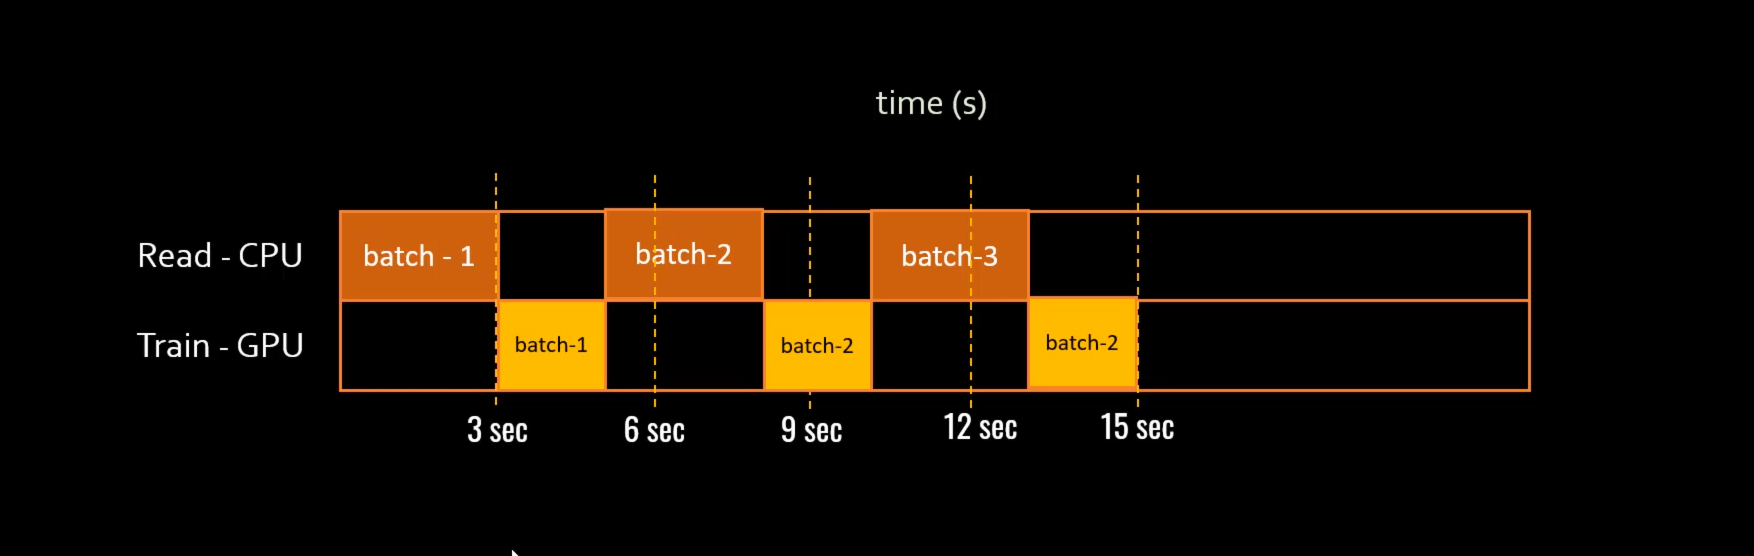

Now, when you prefetch() in Input Data Pipeline for Parallel execution (prefetch is always used at the end of Pipeline so that CPU and GPU works in Parallel)
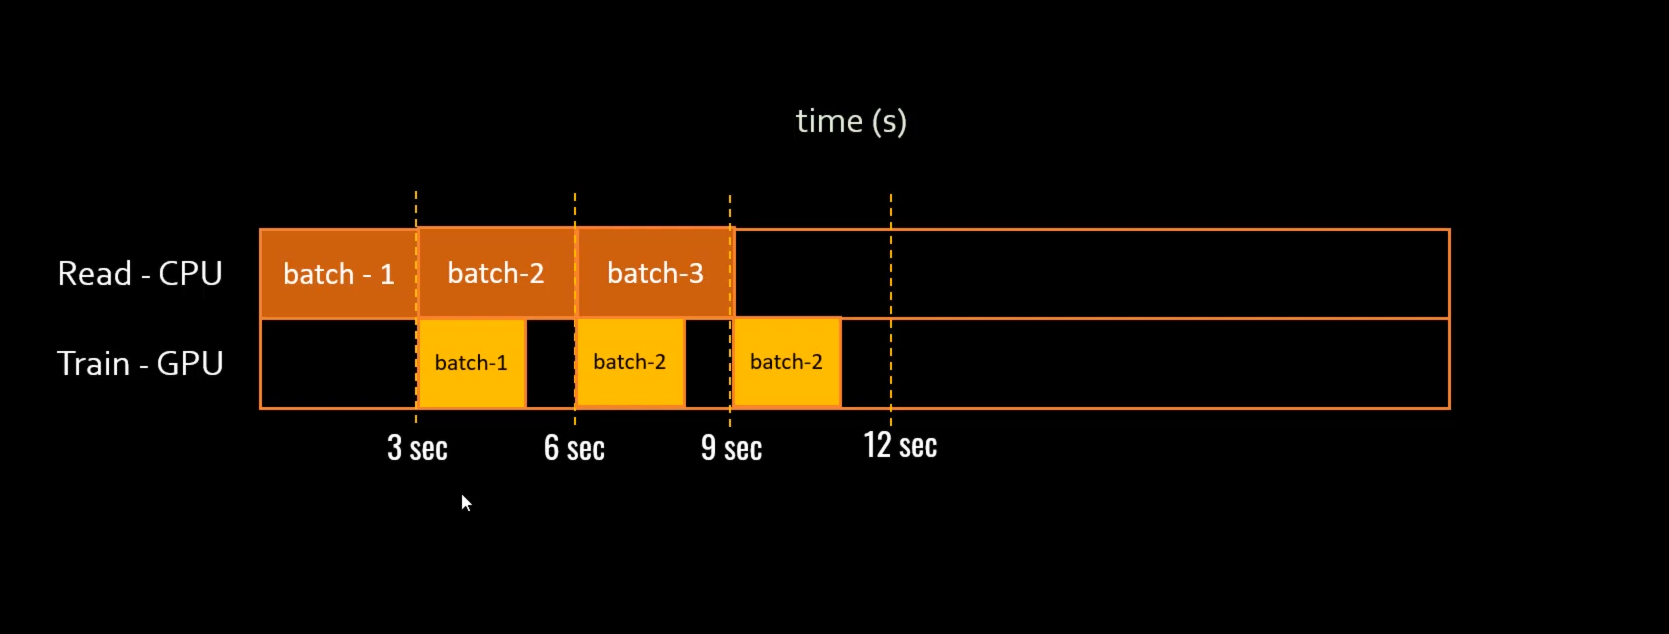

Processing Steps that we have to follow 
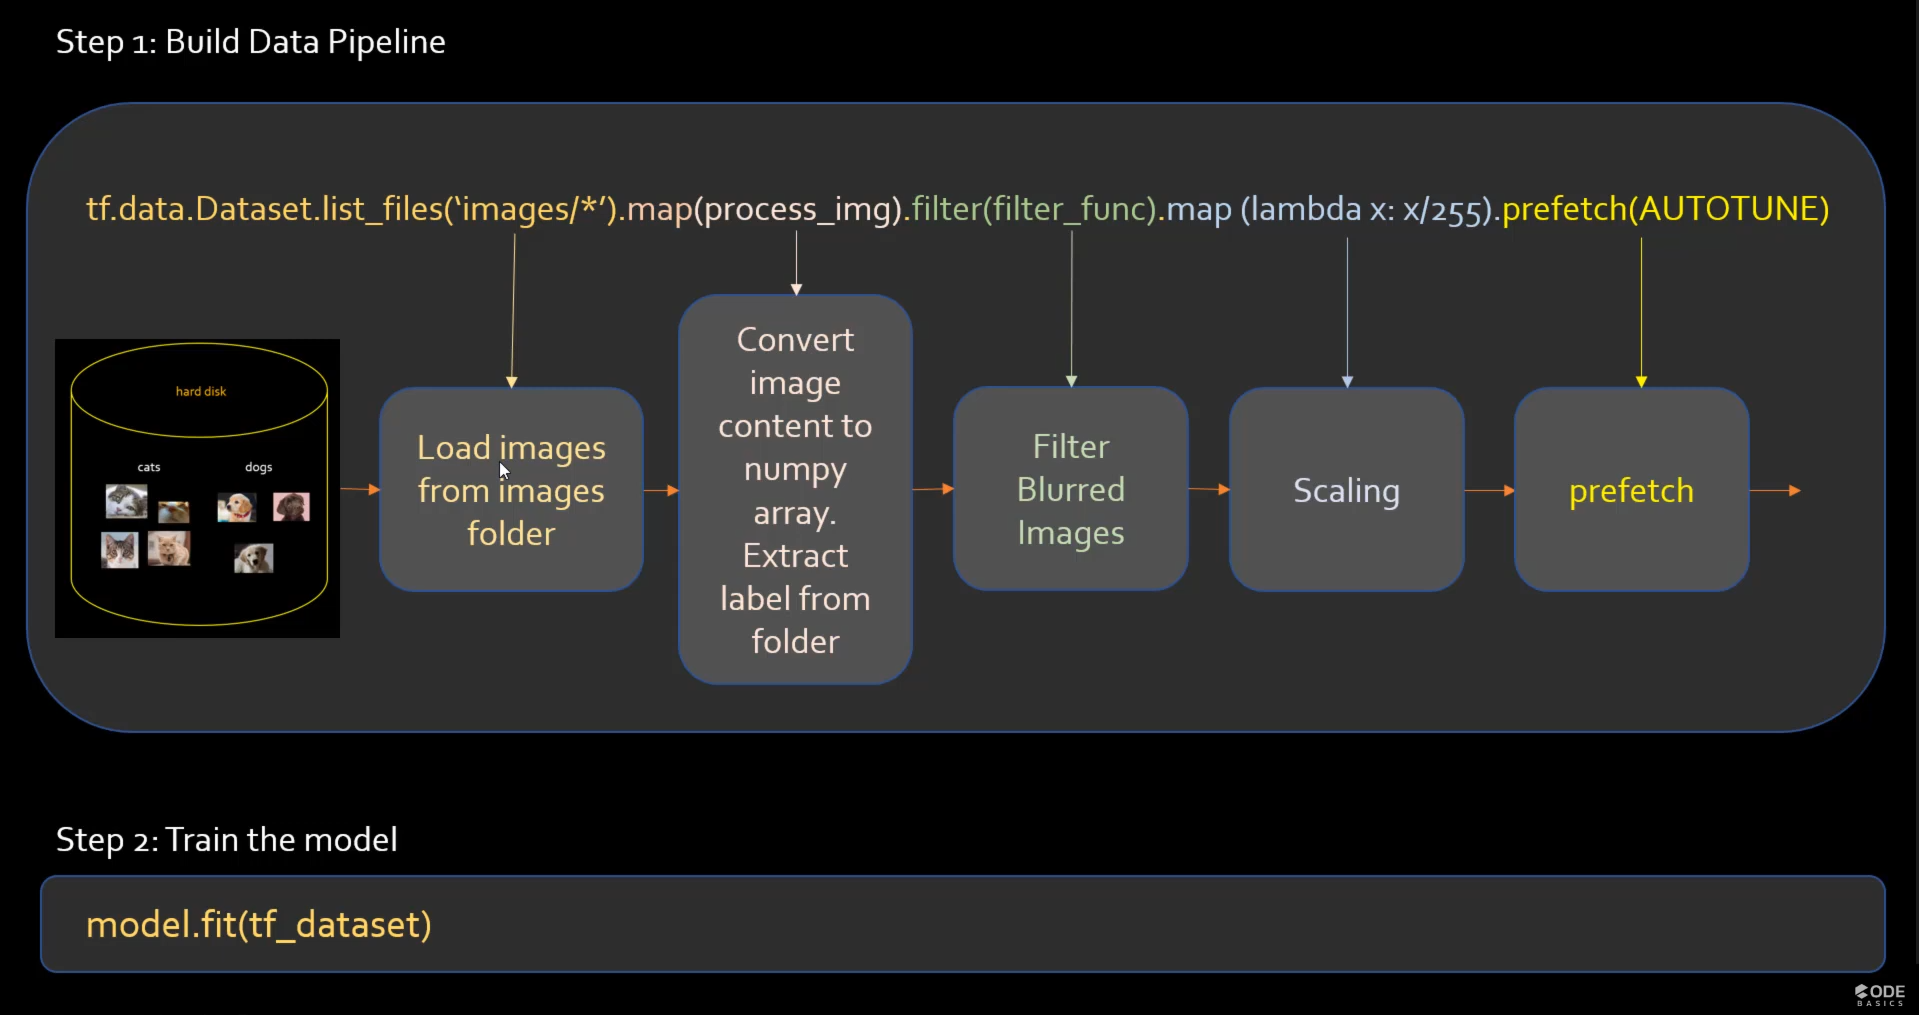

We use .cache() for :-

This means that after the first pass through the dataset, TensorFlow doesn’t have to: (to reduce redundency for increasing the speed) 

1)re-read the data from disk, or

2)re-run expensive preprocessing operations (like image decoding, resizing, etc.)

on subsequent epochs.
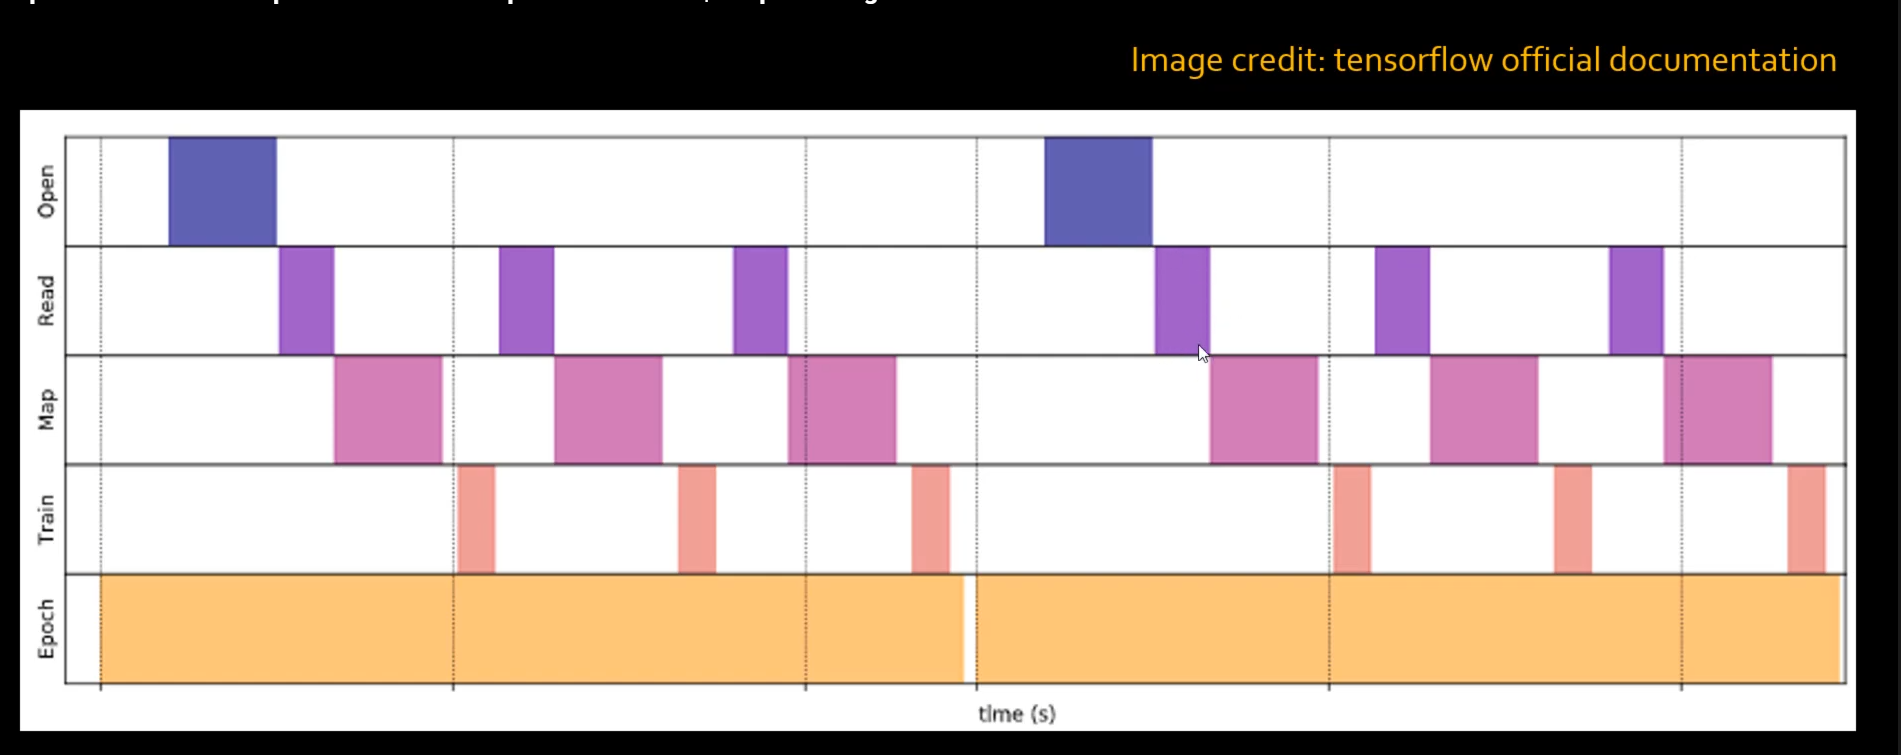

After applying .chache(), jumps/remove unneccessary steps in every epochs to increase the preformance.
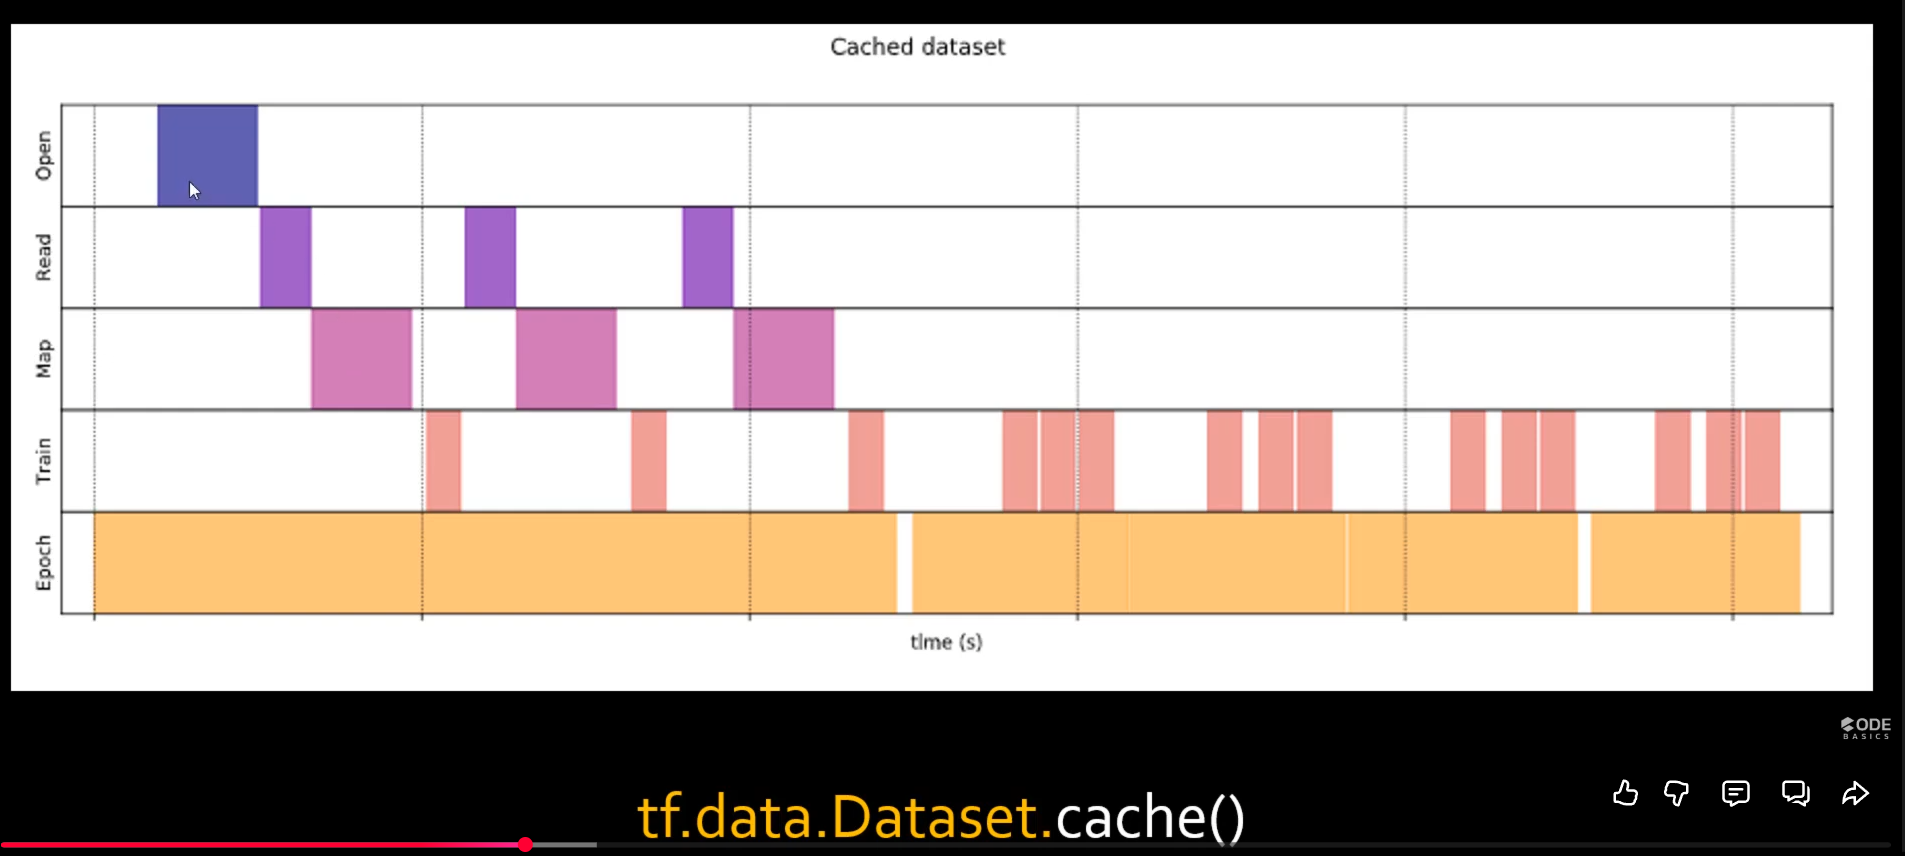

## Code for checking the Performance using dumpy class,functions and time

In [62]:
import tensorflow as tf
import time

In [63]:
tf.__version__

'2.20.0-rc0'

### Prefetch

In [67]:
class FileDataset(tf.data.Dataset):# You are defining a new class called FileDataset that inherits from the existing TensorFlow class tf.data.Dataset.
    def read_file_in_batches(num_samples):
        # Opening the file
        time.sleep(0.03)

        for sample_idx in range(num_samples):
            # Reading data (line, record) from the file
            time.sleep(0.015)

            yield (sample_idx,)

    def __new__(cls, num_samples=3):
        return tf.data.Dataset.from_generator(
            cls.read_file_in_batches,
            output_signature = tf.TensorSpec(shape = (1,), dtype = tf.int64),
            args=(num_samples,)
        )

In [65]:
def benchmark(dataset, num_epochs=2):
    for epoch_num in range(num_epochs):
        for sample in dataset:
            # Performing a training step
            time.sleep(0.01)

In [66]:
%%timeit
benchmark(FileDataset())

249 ms ± 5.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
%%timeit
benchmark(FileDataset().prefetch(1))

248 ms ± 2.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [69]:
%%timeit
benchmark(FileDataset().prefetch(tf.data.AUTOTUNE))

250 ms ± 5.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


As you can notice above, using prefetch improves the performance from 304 ms to 238 and 240 ms

### Cache

In [70]:
dataset = tf.data.Dataset.range(5)
dataset = dataset.map(lambda x: x**2)
dataset = dataset.cache("mycache.txt")
# The first time reading through the data will generate the data using
# `range` and `map`.
list(dataset.as_numpy_iterator())

[np.int64(0), np.int64(1), np.int64(4), np.int64(9), np.int64(16)]

In [71]:
# Subsequent iterations read from the cache.
list(dataset.as_numpy_iterator())

[np.int64(0), np.int64(1), np.int64(4), np.int64(9), np.int64(16)]

In [72]:
def mapped_function(s):
    # Do some hard pre-processing
    tf.py_function(lambda: time.sleep(0.03), [], ())
    return s

In [73]:
%%timeit -r1 -n1
benchmark(FileDataset().map(mapped_function), 5)

1.21 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [74]:
%%timeit -r1 -n1
benchmark(FileDataset().map(mapped_function).cache(), 5)

421 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
